In [6]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.preprocessing import LabelEncoder,StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn import metrics
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC

In [7]:
def drop_columns(df):
  dc=['rerun', 'objid', 'ra', 'fiberid','field','plate']
  for col in sorted(df.columns):
    if col in dc:
      df.drop(col, axis=1, inplace=True)
  return df

In [8]:
# The purpose of this function is create new data set replacing the outlier data using the clip function
def tweak_dr(dr14):
  drop_columns(dr14)
  return(dr14
      .rename(columns={'class': 'Class'})
      .assign(dec= lambda df_: df_.dec.clip(lower= dr14.dec.quantile(.25),
                                            upper= dr14.dec.quantile(.75)),
              u= lambda df_: df_.u.clip(lower= dr14.u.quantile(.25),
                                        upper= dr14.u.quantile(.75)),
              g= lambda df_: df_.g.clip(lower= dr14.g.quantile(.25),
                                        upper= dr14.g.quantile(.75)),
              r= lambda df_: df_.r.clip(lower= dr14.r.quantile(.25),
                                        upper= dr14.r.quantile(.75)),
              i= lambda df_: df_.i.clip(lower= dr14.i.quantile(.25),
                                        upper= dr14.i.quantile(.75)),
              z= lambda df_: df_.z.clip(lower= dr14.z.quantile(.25),
                                        upper= dr14.z.quantile(.75)),
              camcol= lambda df_: df_.camcol.clip(lower= dr14.camcol.quantile(.25),
                                                  upper= dr14.camcol.quantile(.75),),

      )

  )

In [9]:
dr14 = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/Skyserver_adradev_DR14.csv")
dr14_2=tweak_dr(dr14)

In [10]:
dr14_2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 12 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   dec        10000 non-null  float64
 1   u          10000 non-null  float64
 2   g          10000 non-null  float64
 3   r          10000 non-null  float64
 4   i          10000 non-null  float64
 5   z          10000 non-null  float64
 6   run        10000 non-null  int64  
 7   camcol     10000 non-null  int64  
 8   specobjid  10000 non-null  uint64 
 9   Class      10000 non-null  object 
 10  redshift   10000 non-null  float64
 11  mjd        10000 non-null  int64  
dtypes: float64(7), int64(3), object(1), uint64(1)
memory usage: 937.6+ KB


### Select modeling technique

This is a problem of supervised learning nature

Supervised learning learns a function to make prediction of a defined label based on the input data. It can be either classifying data into a category (classification problem) or forecasting an outcome (regression algorithms).

for this reason I will use and compare the next five models:

- 1 Desicion Tree
- 2 K nearest neighbour
- 3 Naive bayes
- 4 Random Forest
- 5 Support Vector Machine

### Generate test design

In [11]:
X = dr14_2.drop('Class', axis=1)
X

,dec,u,g,r,i,z,run,camcol,specobjid,redshift,mjd
0,1.860980,19.275627,17.34262,16.352860,15.924000,15.637037,308,5,5342663162779901952,0.101993,55892
1,1.860980,19.052490,17.03777,16.218625,15.875947,15.637037,308,5,5342400104622956544,0.101533,55892
2,1.860980,18.224453,16.89692,16.466580,16.315740,16.289020,308,5,2316073479176218624,0.000488,53816
3,1.860980,18.224453,16.87660,16.248610,16.147750,16.132210,308,5,2338584330990807040,0.000132,53846
4,1.860980,18.224453,16.87660,16.218625,15.875947,15.637037,308,5,2316072929420404736,0.000093,53816
...,...,...,...,...,...,...,...,...,...,...,...
9995,3.309304,18.560330,17.22085,16.412030,16.025000,15.733240,1462,5,591201118567032832,0.110601,52295
9996,3.361471,19.275627,18.06368,17.578250,17.330423,17.098880,1462,5,591198369787963392,0.110570,52295
9997,3.297791,19.275627,18.06368,17.578250,17.330423,17.213730,1462,5,4511676729161392128,-0.000107,55327
9998,3.418576,18.224453,16.87660,16.218625,15.875947,15.637037,1462,5,591209364904241152,0.025301,52295


In [12]:
y = dr14_2.Class
y

0       GALAXY
1       GALAXY
2         STAR
3         STAR
4         STAR
         ...  
9995    GALAXY
9996    GALAXY
9997      STAR
9998    GALAXY
9999    GALAXY
Name: Class, Length: 10000, dtype: object

In [13]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.2, random_state=1)

X_train.shape, y_train.shape

((2000, 11), (2000,))

### Feature Scaling

In [14]:
sc=StandardScaler()
X_train=sc.fit_transform(X_train)
X_test=sc.transform(X_test)

### Build model

#### Desicion Tree

In [15]:
dt = DecisionTreeClassifier(criterion="gini", max_depth=3)
dt = dt.fit(X_train,y_train)
y_pred = dt.predict(X_test)
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.985875


In [16]:
cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:\n",cm)
print("\nClassification Report:\n",classification_report(y_test, y_pred))

Confusion Matrix:
 [[4251   17   16]
 [  79  816    0]
 [   1    0 2820]]

Classification Report:
               precision    recall  f1-score   support

      GALAXY       0.98      0.99      0.99      4284
         QSO       0.98      0.91      0.94       895
        STAR       0.99      1.00      1.00      2821

    accuracy                           0.99      8000
   macro avg       0.99      0.97      0.98      8000
weighted avg       0.99      0.99      0.99      8000



In [17]:
Evaluation=pd.DataFrame(['Decision Tree'],columns=['Algorithm'])

Evaluation.loc[0,'Precision']=metrics.precision_score(y_test, y_pred, average='micro')
Evaluation.loc[0,'Recall']=metrics.recall_score(y_test, y_pred, average='micro')
Evaluation.loc[0,'F1 Score']=metrics.f1_score(y_test, y_pred, average='micro')
Evaluation.loc[0,'Accuracy']=metrics.accuracy_score(y_test,y_pred)
Evaluation

,Algorithm,Precision,Recall,F1 Score,Accuracy
0,Decision Tree,0.985875,0.985875,0.985875,0.985875


#### KNN

In [18]:
knn=KNeighborsClassifier(n_neighbors=5)

In [19]:
knn.fit(X_train,y_train)

KNeighborsClassifier()

In [20]:
knn.score(X_test,y_test)

0.881875

In [21]:
y_pred=knn.predict(X_test)
cm=confusion_matrix(y_test,y_pred)
cm

array([[4062,    3,  219],
       [ 136,  729,   30],
       [ 549,    8, 2264]])

<Axes: >

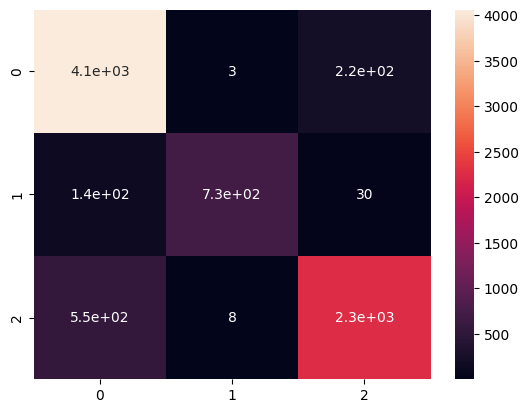

In [22]:
sns.heatmap(cm, annot=True)


In [23]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

      GALAXY       0.86      0.95      0.90      4284
         QSO       0.99      0.81      0.89       895
        STAR       0.90      0.80      0.85      2821

    accuracy                           0.88      8000
   macro avg       0.91      0.86      0.88      8000
weighted avg       0.89      0.88      0.88      8000



In [24]:
Evaluation.loc[1,'Algorithm']='KNN'
Evaluation.loc[1,'Precision']=metrics.precision_score(y_test, y_pred, average='micro')
Evaluation.loc[1,'Recall']=metrics.recall_score(y_test, y_pred, average='micro')
Evaluation.loc[1,'F1 Score']=metrics.f1_score(y_test, y_pred, average='micro')
Evaluation.loc[1,'Accuracy']=metrics.accuracy_score(y_test,y_pred)

####  Naive bayes

In [25]:
nb = GaussianNB()
nb.fit(X_train, y_train)
nb.score(X_test,y_test)
y_pred=nb.predict(X_test)

In [26]:
cm=confusion_matrix(y_test,y_pred)
cm

array([[3752,  519,   13],
       [  53,  842,    0],
       [   8,   22, 2791]])

<Axes: >

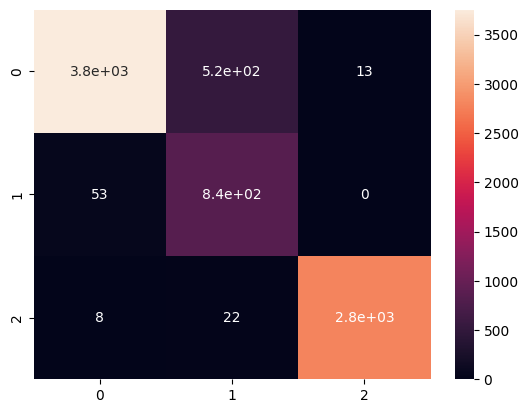

In [27]:
sns.heatmap(cm, annot=True)

In [28]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

      GALAXY       0.98      0.88      0.93      4284
         QSO       0.61      0.94      0.74       895
        STAR       1.00      0.99      0.99      2821

    accuracy                           0.92      8000
   macro avg       0.86      0.94      0.89      8000
weighted avg       0.95      0.92      0.93      8000



In [29]:
Evaluation.loc[2,'Algorithm']='Naive Bayes'
Evaluation.loc[2,'Precision']=metrics.precision_score(y_test, y_pred, average='micro')
Evaluation.loc[2,'Recall']=metrics.recall_score(y_test, y_pred, average='micro')
Evaluation.loc[2,'F1 Score']=metrics.f1_score(y_test, y_pred, average='micro')
Evaluation.loc[2,'Accuracy']=metrics.accuracy_score(y_test,y_pred)

#### Random Forest

In [30]:
classifier1 = RandomForestClassifier(n_estimators = 10, criterion = 'entropy', random_state = 0)
classifier1.fit(X_train, y_train)
y_pred=classifier1.predict(X_test)

In [31]:
cm=confusion_matrix(y_test,y_pred)
cm

array([[4251,   17,   16],
       [  92,  803,    0],
       [   1,    0, 2820]])

<Axes: >

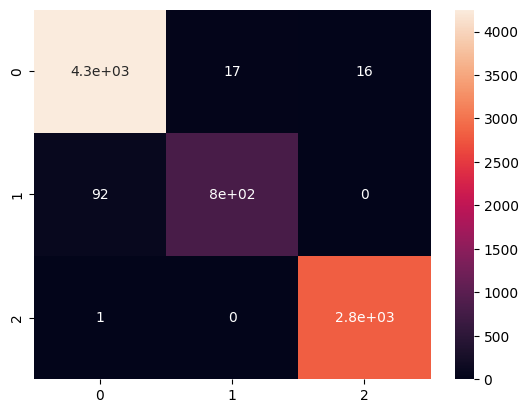

In [32]:
sns.heatmap(cm, annot=True)

In [33]:
Evaluation.loc[3,'Algorithm']='Random Forest'
Evaluation.loc[3,'Precision']=metrics.precision_score(y_test, y_pred, average='micro')
Evaluation.loc[3,'Recall']=metrics.recall_score(y_test, y_pred, average='micro')
Evaluation.loc[3,'F1 Score']=metrics.f1_score(y_test, y_pred, average='micro')
Evaluation.loc[3,'Accuracy']=metrics.accuracy_score(y_test,y_pred)


#### Support Vector Machine

In [34]:
svclassifier = SVC(kernel='linear')
svclassifier.fit(X_train, y_train)
y_pred = svclassifier.predict(X_test)

In [35]:
cm = confusion_matrix(y_test,y_pred)
cm

array([[4152,   17,  115],
       [  79,  816,    0],
       [  49,    0, 2772]])

In [36]:
Evaluation.loc[4,'Algorithm']='SVM'
Evaluation.loc[4,'Precision']=metrics.precision_score(y_test, y_pred, average='micro')
Evaluation.loc[4,'Recall']=metrics.recall_score(y_test, y_pred, average='micro')
Evaluation.loc[4,'F1 Score']=metrics.f1_score(y_test, y_pred, average='micro')
Evaluation.loc[4,'Accuracy']=metrics.accuracy_score(y_test,y_pred)

### Assess model

In [37]:
Evaluation

,Algorithm,Precision,Recall,F1 Score,Accuracy
0,Decision Tree,0.985875,0.985875,0.985875,0.985875
1,KNN,0.881875,0.881875,0.881875,0.881875
2,Naive Bayes,0.923125,0.923125,0.923125,0.923125
3,Random Forest,0.984250,0.984250,0.984250,0.984250
4,SVM,0.967500,0.967500,0.967500,0.967500


## Evaluation – Which model best meets the business objectives?

### Evaluate results:

Do the models meet the business success criteria? Which one(s) should we approve for the business?

In [38]:
Ev=Evaluation.sort_values(by='Accuracy' ,ascending=False)
Ev

,Algorithm,Precision,Recall,F1 Score,Accuracy
0,Decision Tree,0.985875,0.985875,0.985875,0.985875
3,Random Forest,0.984250,0.984250,0.984250,0.984250
4,SVM,0.967500,0.967500,0.967500,0.967500
2,Naive Bayes,0.923125,0.923125,0.923125,0.923125
1,KNN,0.881875,0.881875,0.881875,0.881875


### Review process
The Desicion Tree and the Random Forest are the best models that meet the business succes criteria, follow up by the SVM model.


Despite this imbalanced datasets are those where there is a severe skew in the class distribution, such as 1:100 or 1:1000 examples in the minority class to the majority class, like in this case.

This bias in the training dataset can influence many machine learning algorithms, leading some to ignore the minority class entirely. This is a problem as it is typically the minority class on which predictions are most important.

even after cliping the data to balance the result I could search for Oversample and Undersample results.